# Hierarchical clustering 範例

- 範例目標：讓同學了解如何使用 sklearn 執行 hierarchical clustering
- 範例重點：設定 模型估計參數 以及 資料建模 兩大區塊

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
# !pip3 install --user sklearn
# !pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

np.random.seed(5)
%matplotlib inline

載入 toy example 資料集

In [3]:
toy = datasets.make_blobs(centers=3, n_features=4)
X = toy[0]
y = toy[1]
print('X:\n', X[:10])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 0.70078428  2.44692058  4.95021256  2.47984816]
 [-0.85514846  1.15417531  5.19562704 -0.43938334]
 [-1.26134972  0.89859695  4.70758977  0.89305402]
 [-5.01121552 -7.07256285 -7.12710102  3.62991567]
 [-7.8957584   6.24736767 -5.40795882 10.61018377]
 [ 0.24456995  1.82069899  4.05407379 -0.2048558 ]
 [ 0.97660185  2.92813096  5.15179652  1.72147287]
 [-5.06657892  7.91513345 -5.07319428  8.54298261]
 [-5.96912892  6.65981553 -6.27313606  7.5595934 ]
 [-6.13764981  8.56685089 -5.97278088 10.63232493]]

y:
 [1 1 1 2 0 1 1 0 0 0]

unique y:
 [0 1 2]


設定 模型 估計參數

In [4]:
estimators = [('hc_ward', AgglomerativeClustering(n_clusters=3, linkage='ward'),), # MSE(Mean-Square Error)
              ('hc_average', AgglomerativeClustering(n_clusters=3, linkage='average'),),
              ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage='complete'),)]

資料建模 並 視覺化 結果

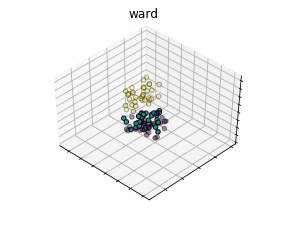

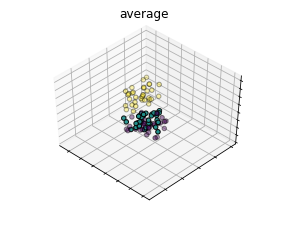

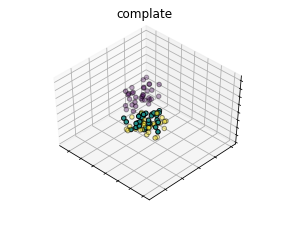

In [5]:
fignum = 1
titles = ['ward', 'average', 'complate']
for name, est in estimators:
    est.fit(X) # fit data
    
    fig = plt.figure(fignum, figsize=(4, 3,))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=est.labels_.astype(np.float), edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12 # dist is the distance of the eye viewing point from the object point.
    fignum = fignum + 1

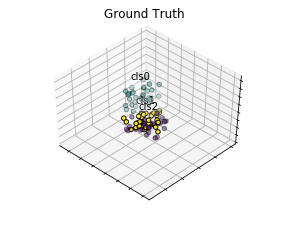

In [6]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3,))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for name, label in [('cls0', 0,), ('cls1', 1,), ('cls2', 2,)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 5, name,
              horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=np.choose(y, [1, 2, 0]).astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12